In [2]:
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import glob
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import pickle
import time

pandas 0.25.1
numpy 1.17.2


# load data from pickle file

In [3]:
with open("list_of_df_other_notebooks_1616553245.325566.pkl",'rb') as handl:
    lst_of_df = pickle.load(handl)

In [4]:
len(lst_of_df)

3

In [5]:
df = lst_of_df[0]['df']

In [6]:
print(df.shape)
df.head()

(600, 117)


,CPU percent for 0,CPU percent for 1,CPU percent for 2,CPU percent for 3,CPU percent for 4,CPU percent for 5,CPU percent for 6,CPU percent for 7,CPU percent for 8,CPU percent for 9,...,process memory: vms,process memory: pfaults,process memory: pageins,process memory: uss,process cpu times: user,process cpu times: system,process cpu times: children_user,process cpu times: children_system,process number context switches: voluntary,process number context switches: involuntary
0,25.3,0.2,19.3,0.2,14.4,0.1,12.1,0.1,9.1,0.1,...,4724727808,23531,823,49836032,0.489987,0.146503,0.0,0.0,140728898422242,0
1,19.4,0.0,16.7,0.0,8.4,0.0,9.3,0.0,4.7,0.9,...,4724727808,23531,823,49836032,0.490010,0.146514,0.0,0.0,140728898422243,0
2,22.0,0.0,20.0,0.0,12.6,0.0,12.6,0.0,10.8,0.0,...,4724727808,23531,823,49836032,0.490036,0.146529,0.0,0.0,140728898422244,0
3,20.0,0.0,17.6,0.0,10.2,0.0,9.3,0.9,7.4,0.0,...,4724727808,23531,823,49836032,0.490061,0.146544,0.0,0.0,140728898422245,0
4,12.1,0.9,15.7,0.0,8.4,0.0,2.8,0.0,3.7,0.0,...,4724727808,23531,823,49836032,0.490086,0.146565,0.0,0.0,140728898422246,0


# drop column if entire column is constant value

In [7]:
# https://stackoverflow.com/questions/39658574/how-to-drop-columns-which-have-same-values-in-all-rows-via-pandas-or-spark-dataf
series_of_unique_values_per_column = df.apply(pandas.Series.nunique)
cols_to_drop = series_of_unique_values_per_column[series_of_unique_values_per_column == 1].index
df = df.drop(cols_to_drop, axis=1)
print(df.shape)
df.head()

(600, 92)


,CPU percent for 0,CPU percent for 1,CPU percent for 2,CPU percent for 3,CPU percent for 4,CPU percent for 5,CPU percent for 6,CPU percent for 7,CPU percent for 8,CPU percent for 9,...,system virtual memory wired,system swap memory sin,system swap memory sout,process memory: rss,process memory: vms,process memory: pfaults,process memory: uss,process cpu times: user,process cpu times: system,process number context switches: voluntary
0,25.3,0.2,19.3,0.2,14.4,0.1,12.1,0.1,9.1,0.1,...,3354652672,200248778752,510201856,64004096,4724727808,23531,49836032,0.489987,0.146503,140728898422242
1,19.4,0.0,16.7,0.0,8.4,0.0,9.3,0.0,4.7,0.9,...,3380555776,200248778752,510201856,64004096,4724727808,23531,49836032,0.490010,0.146514,140728898422243
2,22.0,0.0,20.0,0.0,12.6,0.0,12.6,0.0,10.8,0.0,...,3386265600,200248778752,510201856,64004096,4724727808,23531,49836032,0.490036,0.146529,140728898422244
3,20.0,0.0,17.6,0.0,10.2,0.0,9.3,0.9,7.4,0.0,...,3385667584,200248778752,510201856,64004096,4724727808,23531,49836032,0.490061,0.146544,140728898422245
4,12.1,0.9,15.7,0.0,8.4,0.0,2.8,0.0,3.7,0.0,...,3387359232,200248778752,510201856,64004096,4724727808,23531,49836032,0.490086,0.146565,140728898422246


# scatter plot per column

In [8]:
def scatter_plot_column(df,col_name):
    if not isinstance(df,pandas.core.frame.DataFrame):
        raise TypeError('ERROR: expected input of type dataframe, got',type(df))
        return None
    print(col_name)
    x=df['time in unix seconds']
    y=df[col_name]
    # https://stackoverflow.com/questions/31126698/differences-between-scipy-stats-linregress-numpy-polynomial-polynomial-polyfi
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    print('r',r_value)
    print('p',p_value)
    print('std error:',std_err)

    _=plt.figure(figsize=(5,4))
    if (abs(1-r_value)<0.01):
        plt.scatter(x,y,label='original')
        plt.plot(x, intercept + slope*x, 'r', label='fitted line')
        linear=True
    else:
        plt.plot_date(x=df['datetime'],y=df[col_name],label='original')
        plt.xticks(rotation=40)
        linear=False
    
    _=plt.ylabel(col_name,fontsize=14)
    _=plt.xlabel('time',fontsize=14)
    plt.show()
    return linear

CPU percent for 0
r 0.14708355221799485
p 0.000300391465718456
std error: 0.001595488642509717


/Users/msarica/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


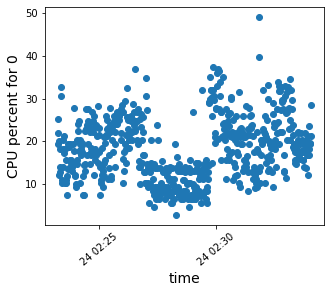

CPU percent for 1
r 0.04536242963740544
p 0.2672567622098159
std error: 8.26293391201428e-05


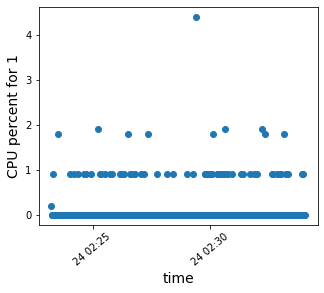

CPU percent for 2
r 0.13947363545669647
p 0.0006124784074731781
std error: 0.0013922623928352283


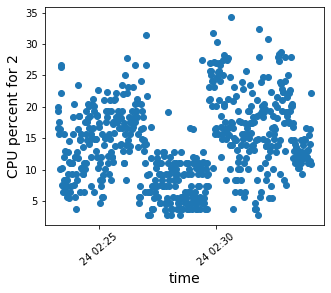

CPU percent for 3
r 0.05869912389491857
p 0.1509826769583535
std error: 7.468650923469433e-05


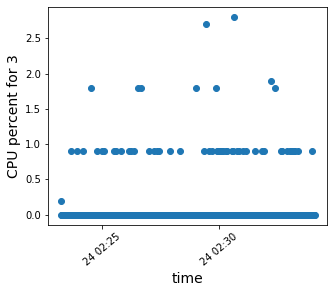

CPU percent for 4
r 0.16318072784431956
p 5.926789944348118e-05
std error: 0.001272331605403694


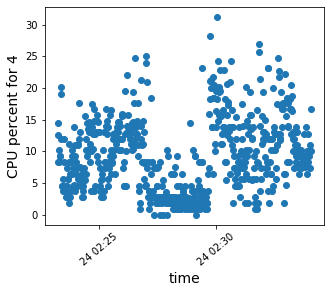

CPU percent for 5
r 0.06552744262118887
p 0.10883214058858255
std error: 7.214218435767964e-05


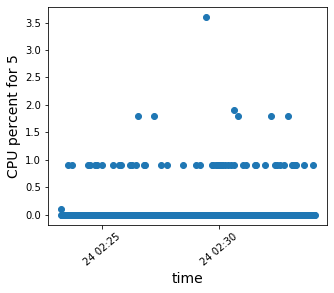

CPU percent for 6
r 0.1681698118414731
p 3.4695164302601356e-05
std error: 0.0012326128163790192


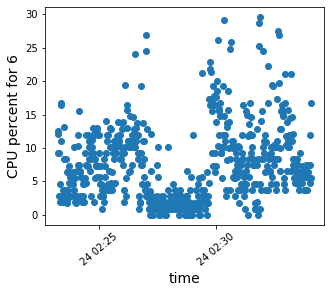

CPU percent for 7
r 0.05960851013915098
p 0.14474230088421372
std error: 6.82079104284921e-05


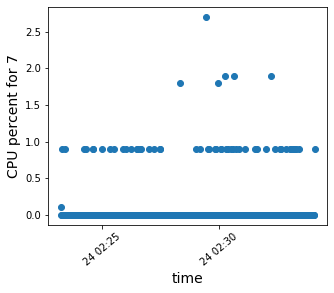

CPU percent for 8
r 0.1402395854427834
p 0.0005709962979663414
std error: 0.0010682521159793513


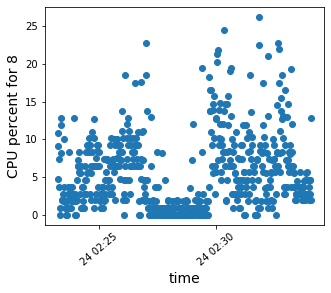

CPU percent for 9
r 0.03728717901396301
p 0.3618960821370367
std error: 6.723668050620207e-05


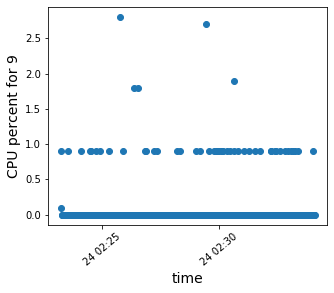

CPU percent for 10
r 0.11136343966036127
p 0.006321035878899717
std error: 0.0009550457870042098


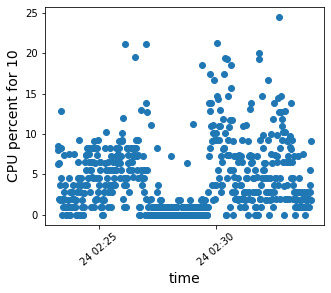

CPU percent for 11
r 0.05735826424469685
p 0.16055412560182053
std error: 6.203120656447027e-05


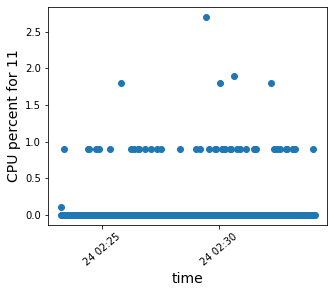

CPU percent for 12
r 0.1395124532460112
p 0.000610310568356141
std error: 0.0007678898437465363


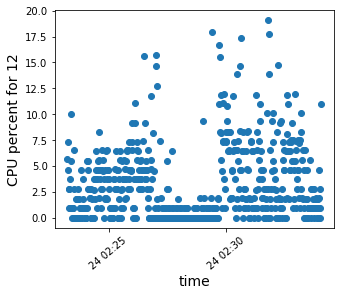

CPU percent for 13
r 0.043760097138075
p 0.28453986354136224
std error: 6.448232161308478e-05


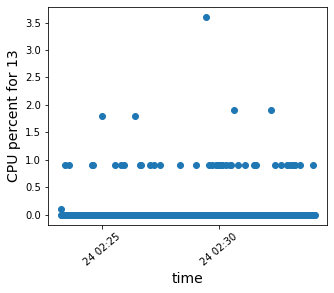

CPU percent for 14
r 0.13165891541444866
p 0.0012278633868209007
std error: 0.0007535395782728244


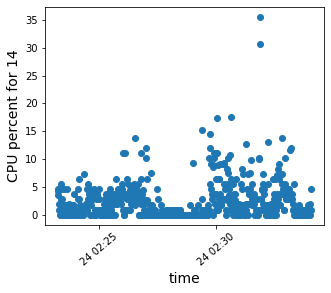

CPU percent for 15
r 0.03082243865500149
p 0.4510911738638541
std error: 5.7001519681544405e-05


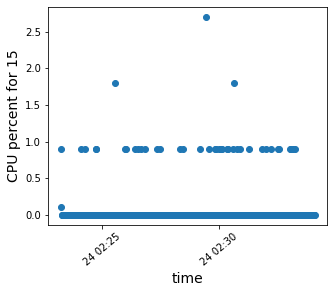

time in unix seconds
datetime
CPU 1 times user
r 0.17115789055076489
p 2.498962107975829e-05
std error: 0.001074775827216116


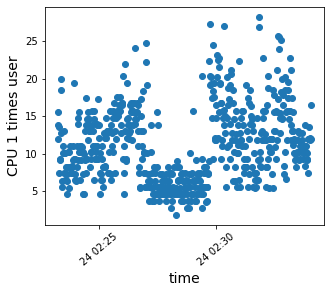

CPU 1 times system
r 0.08118809015874204
p 0.04683056920257779
std error: 0.0006231623405293304


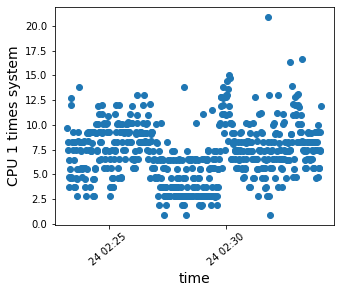

CPU 1 times idle
r -0.14703078115913748
p 0.0003019154884488187
std error: 0.0015953061299842854


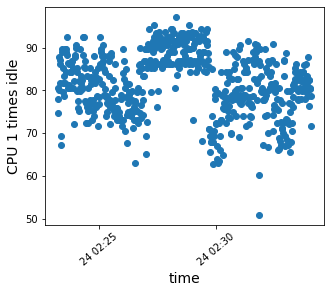

CPU 2 times user
r 0.04979648550188852
p 0.22323465154073824
std error: 4.8745815546310994e-05


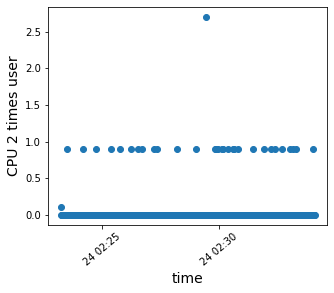

CPU 2 times system
r 0.023096363185885878
p 0.5723196000194086
std error: 5.48025810872201e-05


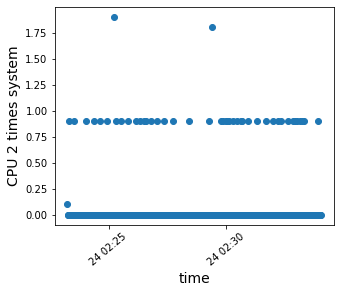

CPU 2 times idle
r -0.045362429637405464
p 0.2672567622098156
std error: 8.262933912014314e-05


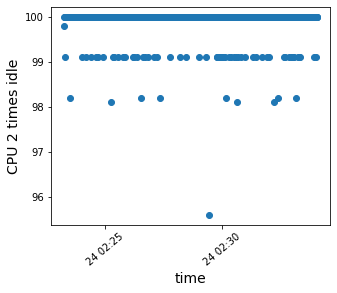

CPU 3 times user
r 0.18764845899734148
p 3.691832521419393e-06
std error: 0.0009772384805748556


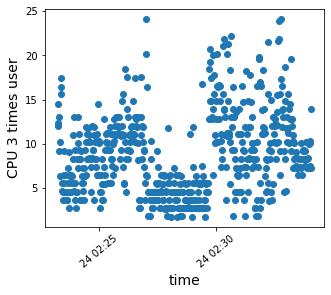

CPU 3 times system
r 0.01627438808481243
p 0.6907521707995365
std error: 0.0005102239770667486


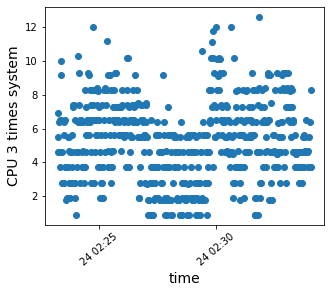

CPU 3 times idle
r -0.13942905803793948
p 0.000614976717947757
std error: 0.0013927583054401814


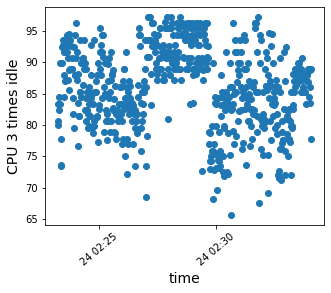

CPU 4 times user
r 0.050050439198291274
p 0.22088013506095147
std error: 4.414747709003908e-05


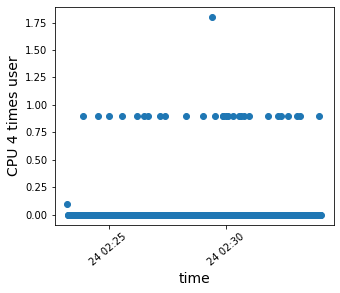

CPU 4 times system
r 0.04331066018132907
p 0.2895201275056422
std error: 4.9314158560920676e-05


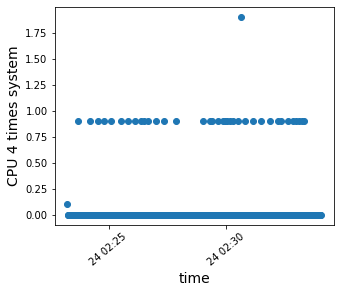

CPU 4 times idle
r -0.05869912389491868
p 0.1509826769583528
std error: 7.468650923469458e-05


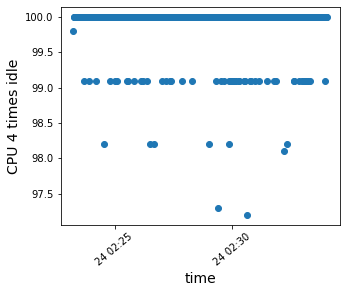

CPU 5 times user
r 0.2072467314035408
p 3.0293939014302304e-07
std error: 0.0009180235812921681


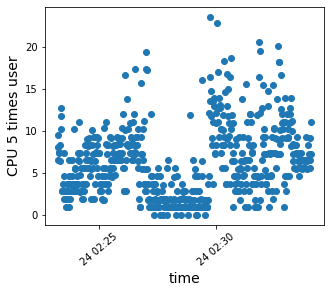

CPU 5 times system
r 0.03662743427727458
p 0.3704584979078931
std error: 0.00043418854418242054


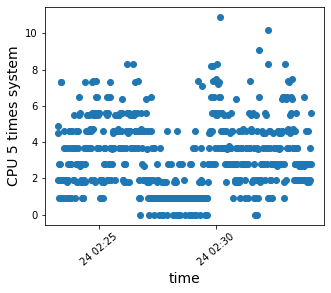

CPU 5 times idle
r -0.16317878833791466
p 5.928005979427513e-05
std error: 0.0012725533247275188


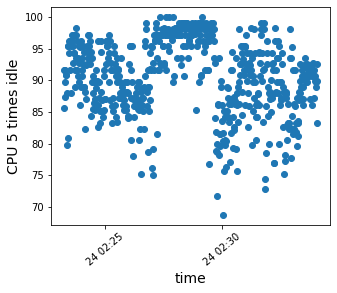

CPU 6 times user
r 0.06240581501236537
p 0.12677968864894062
std error: 4.476081068474704e-05


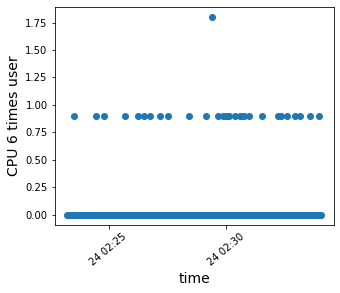

CPU 6 times system
r 0.041545282128065755
p 0.3096465474348421
std error: 4.606684139736875e-05


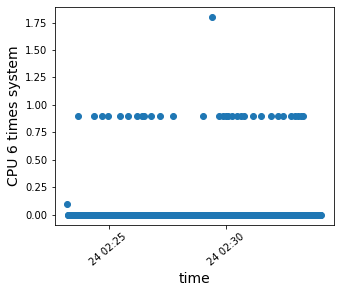

CPU 6 times idle
r -0.06552744262118898
p 0.10883214058858197
std error: 7.214218435767981e-05


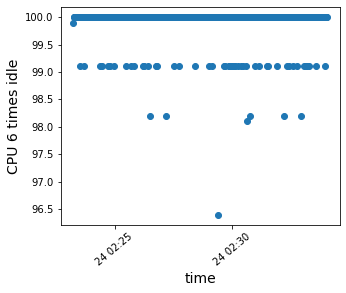

CPU 7 times user
r 0.18768855464954787
p 3.6739302127511895e-06
std error: 0.0009179158444247628


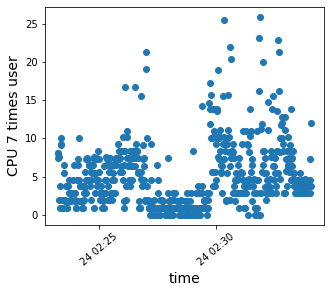

CPU 7 times system
r 0.09154701857926596
p 0.02493106035462426
std error: 0.0003951646081435676


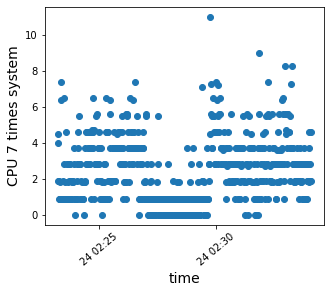

CPU 7 times idle
r -0.1682253442871932
p 3.448598047411215e-05
std error: 0.0012330572123791129


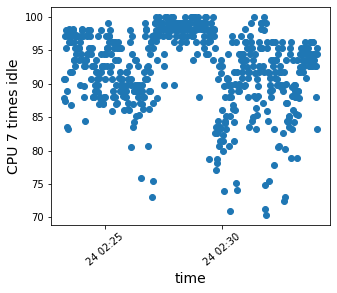

CPU 8 times user
r 0.04226799721221082
p 0.3012983247374043
std error: 4.3504812715951634e-05


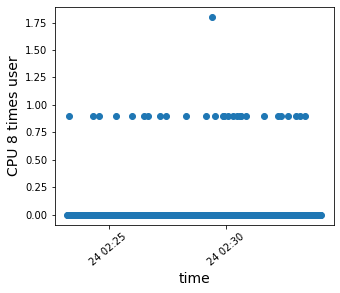

CPU 8 times system
r 0.046667687510053936
p 0.25372083053794725
std error: 4.63638453036754e-05


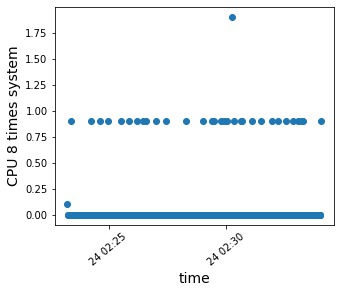

CPU 8 times idle
r -0.0587798638602987
p 0.1504204845606506
std error: 6.914082392228301e-05


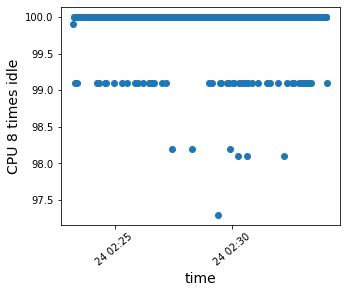

CPU 9 times user
r 0.16416669387966992
p 5.3381984645432805e-05
std error: 0.0008070843802691283


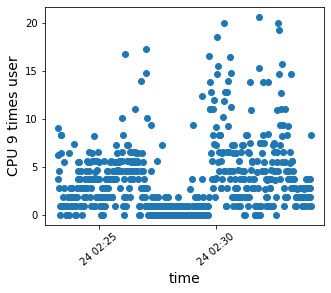

CPU 9 times system
r 0.049976256357194
p 0.22156607308767512
std error: 0.00033401965405299765


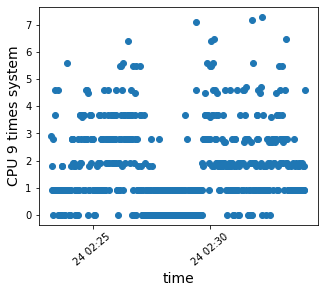

CPU 9 times idle
r -0.14022000734504408
p 0.0005720232799345024
std error: 0.001067698201935402


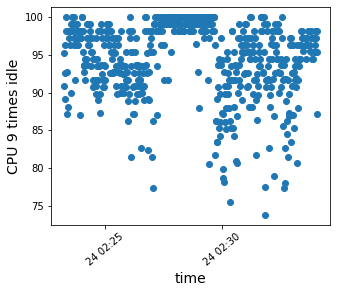

CPU 10 times user
r 0.03809400222733357
p 0.3515944869615416
std error: 4.5274373203094094e-05


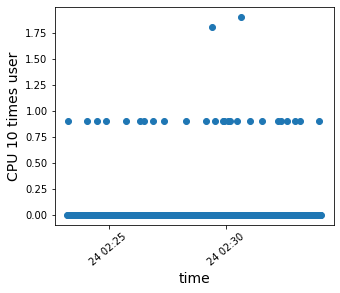

CPU 10 times system
r 0.020509109883634222
p 0.6161081643682627
std error: 4.2863844324786396e-05


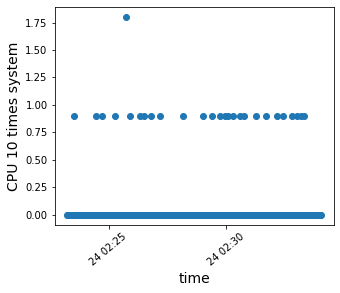

CPU 10 times idle
r -0.03728717901396333
p 0.3618960821370325
std error: 6.723668050620236e-05


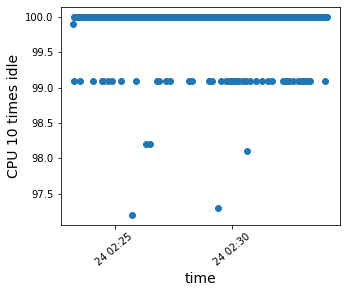

CPU 11 times user
r 0.1349032307846246
p 0.0009239847440990511
std error: 0.0007332916808110454


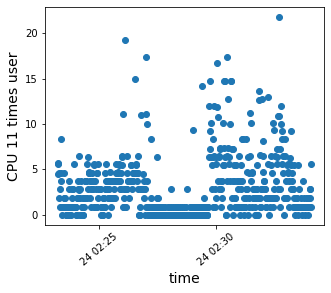

CPU 11 times system
r 0.0225934539089893
p 0.5807149029019948
std error: 0.0002926109045736597


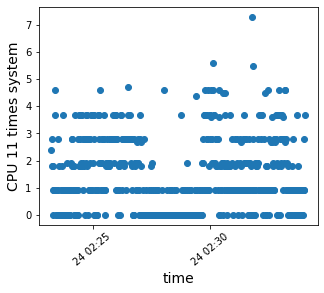

CPU 11 times idle
r -0.11124422468107381
p 0.006377673434283016
std error: 0.0009547756280372753


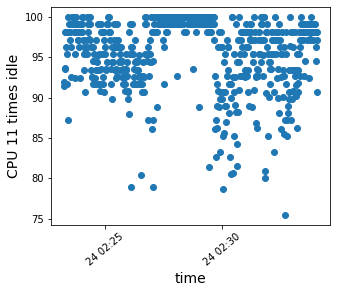

CPU 12 times user
r 0.06408429993589569
p 0.11686315712943132
std error: 4.21038421474226e-05


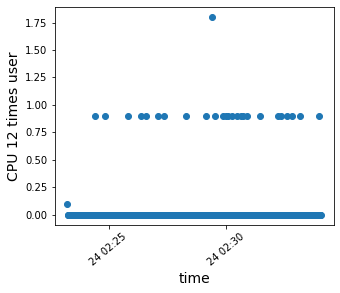

CPU 12 times system
r 0.022234594575593316
p 0.5867404575719768
std error: 3.7632302740649764e-05


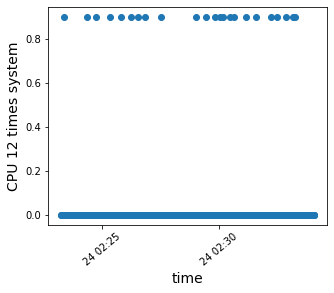

CPU 12 times idle
r -0.05735826424469703
p 0.16055412560181917
std error: 6.203120656447046e-05


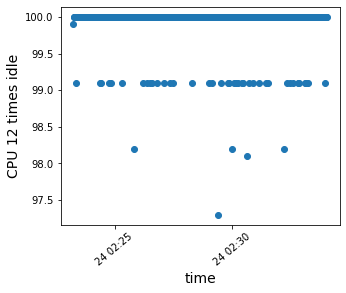

CPU 13 times user
r 0.15004716912549265
p 0.00022546649862445218
std error: 0.0005843349473233503


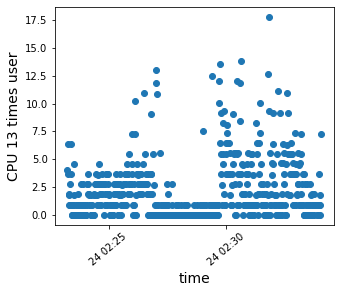

CPU 13 times system
r 0.07601306268744105
p 0.06278059432977187
std error: 0.00024862658365101294


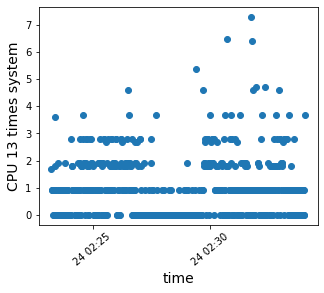

CPU 13 times idle
r -0.13928873685648735
p 0.0006229028049135151
std error: 0.0007678517316992945


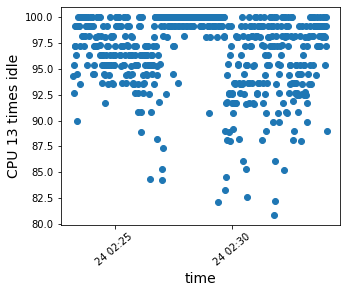

CPU 14 times user
r 0.037715177096784624
p 0.35640807681593334
std error: 4.444006003576367e-05


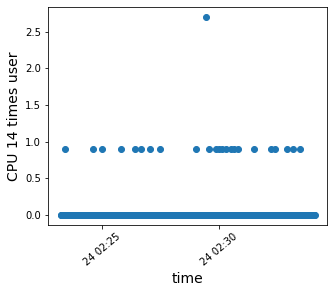

CPU 14 times system
r 0.031085735758045744
p 0.4472320283647321
std error: 3.6828300002932436e-05


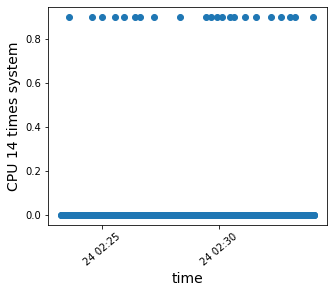

CPU 14 times idle
r -0.043701385415617224
p 0.2851871514612525
std error: 6.383592575577332e-05


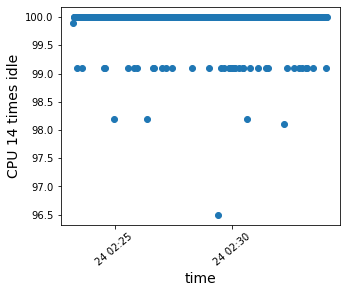

CPU 15 times user
r 0.14716026342365524
p 0.0002981888664521909
std error: 0.0006231906717587328


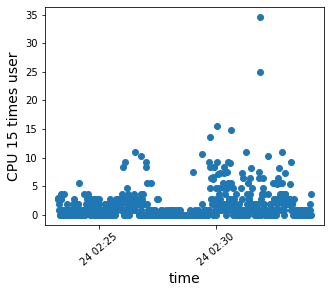

CPU 15 times system
r 0.03662336883865115
p 0.3705116467373094
std error: 0.00019153585972321637


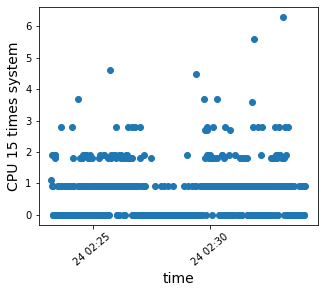

CPU 15 times idle
r -0.13173999087991944
p 0.001219262345435961
std error: 0.0007535336067867013


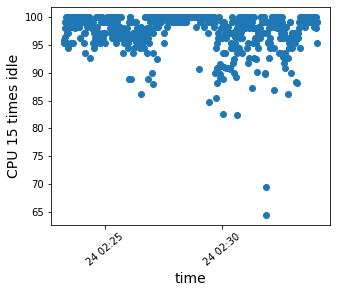

CPU 16 times user
r 0.028920077380448342
p 0.47952609157592396
std error: 4.14735347613918e-05


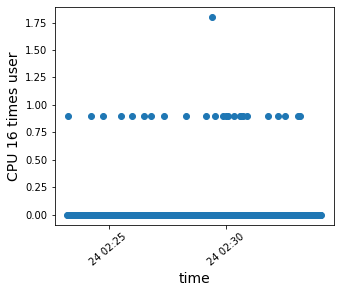

CPU 16 times system
r 0.01855648283964484
p 0.650094913405213
std error: 3.343792407351407e-05


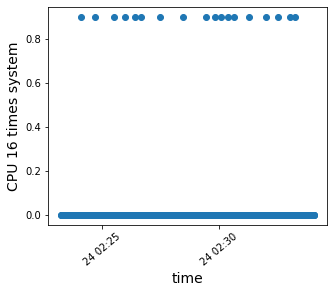

CPU 16 times idle
r -0.03109416020672929
p 0.44710886121039395
std error: 5.724775224739287e-05


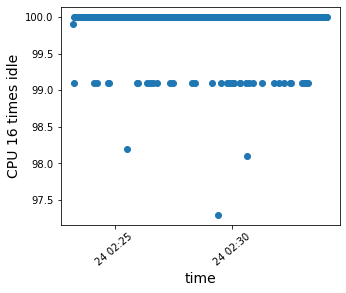

disk disk0 read_count
r 0.9731468681817182
p 0.0
std error: 0.07372459108869743


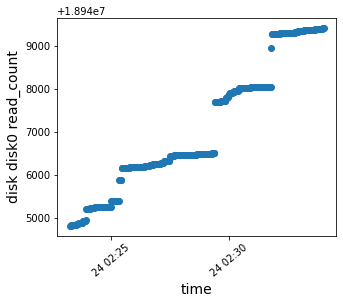

disk disk0 write_count
r 0.9941181617317152
p 0.0
std error: 0.1312969962900904


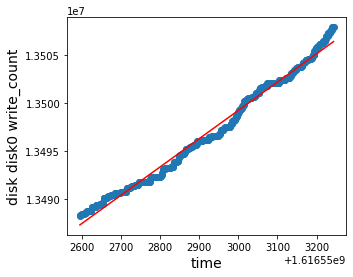

disk disk0 read_bytes
r 0.9755693022308379
p 0.0
std error: 999.8654320652369


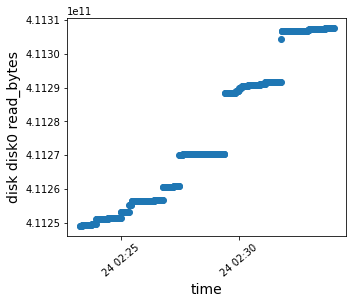

disk disk0 write_bytes
r 0.9936493384392869
p 0.0
std error: 1108.6294354171214


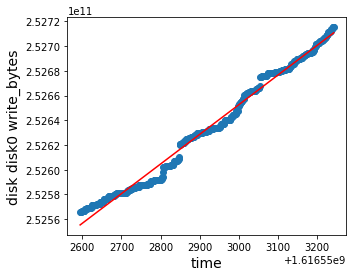

disk disk0 read_time
r 0.9723706822632852
p 0.0
std error: 0.01912296896054321


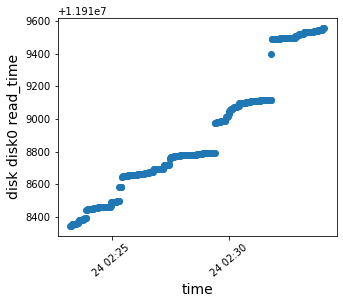

disk disk0 write_time
r 0.9942302434780969
p 0.0
std error: 0.11378416753347377


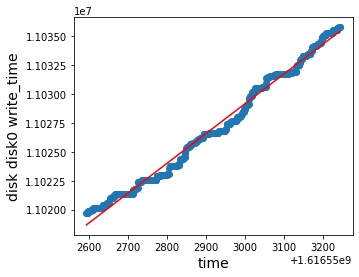

CPU stats ctx_switches
r 0.36883321885345577
p 8.99502718288556e-21
std error: 6.641783818126061


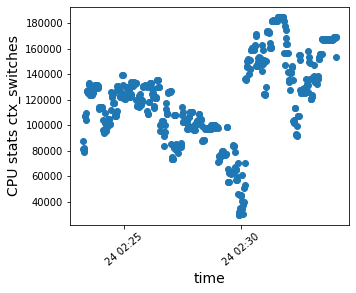

CPU stats interrupts
r 0.06480739268148307
p 0.11278299588243743
std error: 9.340773562168204


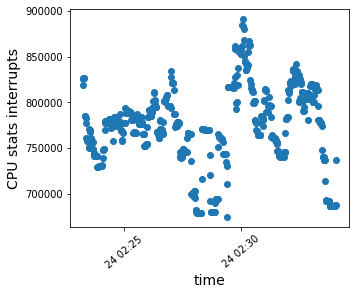

CPU stats soft_interrupts
r 0.9994422450862545
p 0.0
std error: 4.5604878742641235


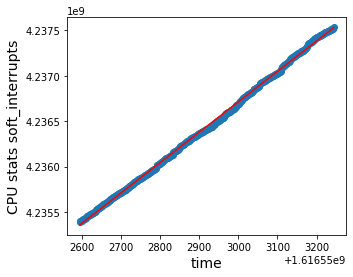

CPU stats syscalls
r 0.31023343752728577
p 7.487950990985197e-15
std error: 3.780217102837163


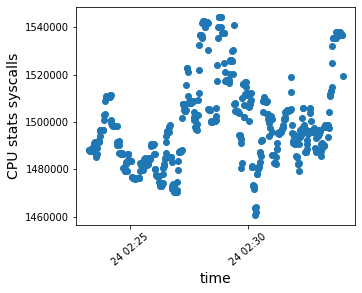

system virtual memory available
r 0.5134666035920334
p 1.1467297120318468e-41
std error: 26485.062604486695


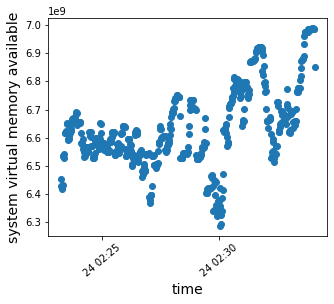

system virtual memory percent
r -0.5156396308080567
p 4.599252153539792e-42
std error: 0.00015471037502129772


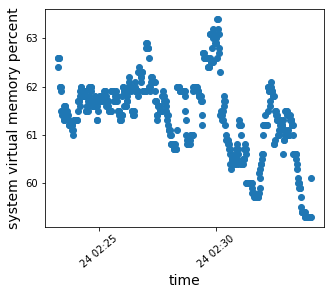

system virtual memory used
r -0.514374839194099
p 7.833827634426454e-42
std error: 26499.289228585912


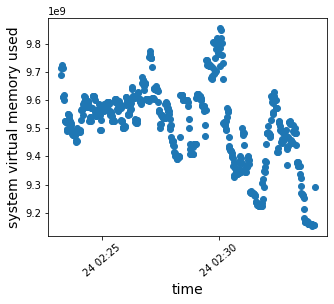

system virtual memory free
r 0.7063471659090907
p 8.594919434547204e-92
std error: 35379.48278201594


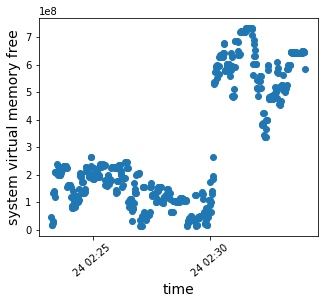

system virtual memory active
r -0.5690668141662483
p 8.752013691230508e-53
std error: 26557.862376441222


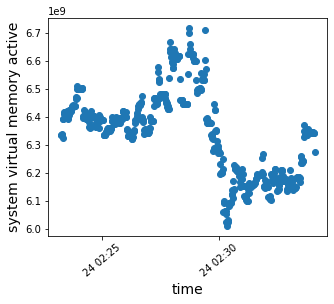

system virtual memory inactive
r 0.31023330849798453
p 7.488152338527629e-15
std error: 15483.772488516053


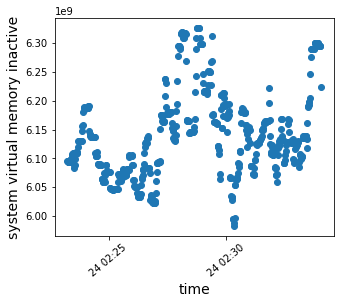

system virtual memory wired
r 0.06481184484489749
p 0.11275822535420552
std error: 38259.304297131464


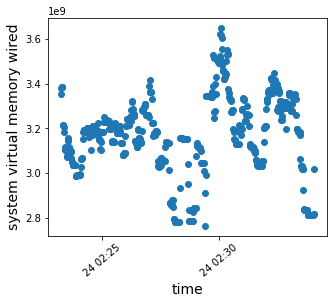

system swap memory sin
r 0.9685515797363887
p 0.0
std error: 830.3537513772852


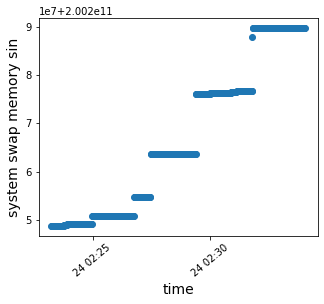

system swap memory sout
r 0.8818428258045403
p 2.1567493338857728e-197
std error: 94.38820695307544


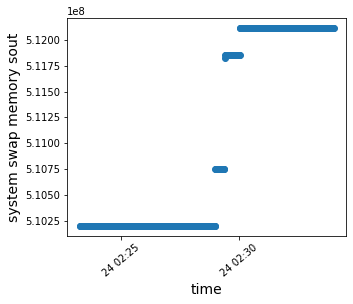

process memory: rss
r 0.7903907336714251
p 2.2297892997268175e-129
std error: 84.0769140607295


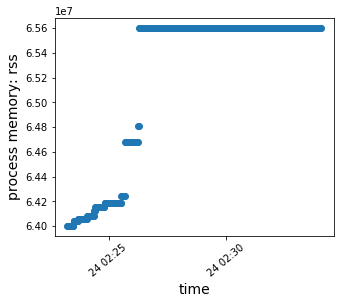

process memory: vms
r 0.7734322842781021
p 1.676019414622138e-120
std error: 1231.3197290860528


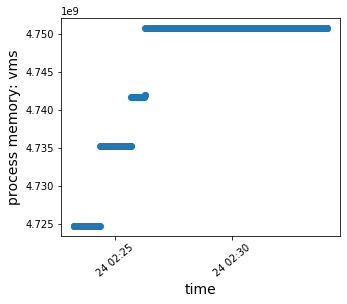

process memory: pfaults
r 0.7907717325645137
p 1.378606467265618e-129
std error: 0.021219282045785923


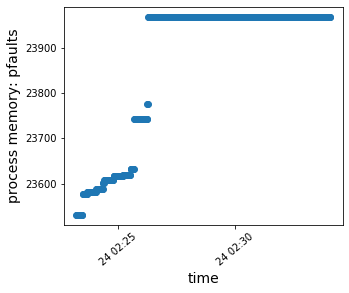

process memory: uss
r 0.7902931331889065
p 2.5216692581819202e-129
std error: 82.8194451035172


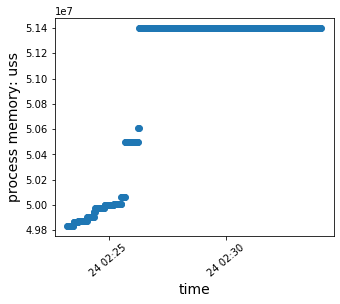

process cpu times: user
r 0.7955040399499342
p 3.2270910979878064e-132
std error: 2.0753129184794744e-05


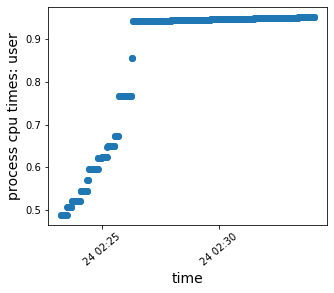

process cpu times: system
r 0.8057511408529252
p 3.687336981877551e-138
std error: 6.9909162232397285e-06


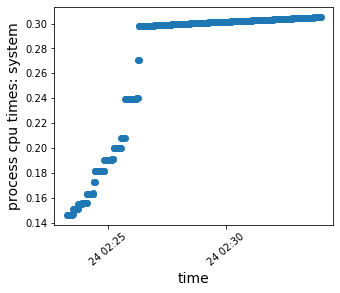

process number context switches: voluntary
r 0.7955681071054123
p 2.969758000098007e-132
std error: 1.6483007963526985


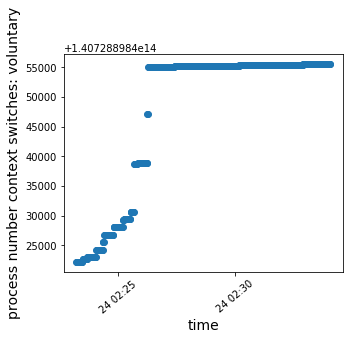

In [9]:
list_of_linear_columns=[]
for col_name in df.columns:
    if ('seconds' in col_name) or ('datetime' in col_name):
        print(col_name)
    else:
#        plt.scatter(x=df['time in unix seconds'],y=df[col_name])
        linear_bool = scatter_plot_column(df,col_name)
        if (linear_bool):
            list_of_linear_columns.append(col_name)

# drop columns that are linear

In [10]:
list_of_linear_columns

['disk disk0 write_count',
 'disk disk0 write_bytes',
 'disk disk0 write_time',
 'CPU stats soft_interrupts']

In [11]:
df = df.drop(list_of_linear_columns, axis=1)
print(df.shape)
df.head()

(600, 88)


,CPU percent for 0,CPU percent for 1,CPU percent for 2,CPU percent for 3,CPU percent for 4,CPU percent for 5,CPU percent for 6,CPU percent for 7,CPU percent for 8,CPU percent for 9,...,system virtual memory wired,system swap memory sin,system swap memory sout,process memory: rss,process memory: vms,process memory: pfaults,process memory: uss,process cpu times: user,process cpu times: system,process number context switches: voluntary
0,25.3,0.2,19.3,0.2,14.4,0.1,12.1,0.1,9.1,0.1,...,3354652672,200248778752,510201856,64004096,4724727808,23531,49836032,0.489987,0.146503,140728898422242
1,19.4,0.0,16.7,0.0,8.4,0.0,9.3,0.0,4.7,0.9,...,3380555776,200248778752,510201856,64004096,4724727808,23531,49836032,0.490010,0.146514,140728898422243
2,22.0,0.0,20.0,0.0,12.6,0.0,12.6,0.0,10.8,0.0,...,3386265600,200248778752,510201856,64004096,4724727808,23531,49836032,0.490036,0.146529,140728898422244
3,20.0,0.0,17.6,0.0,10.2,0.0,9.3,0.9,7.4,0.0,...,3385667584,200248778752,510201856,64004096,4724727808,23531,49836032,0.490061,0.146544,140728898422245
4,12.1,0.9,15.7,0.0,8.4,0.0,2.8,0.0,3.7,0.0,...,3387359232,200248778752,510201856,64004096,4724727808,23531,49836032,0.490086,0.146565,140728898422246


# find correlated columns and drop all but one of the correlated columns

https://stackoverflow.com/questions/39409866/correlation-heatmap


elapsed: 72.82028913497925 seconds


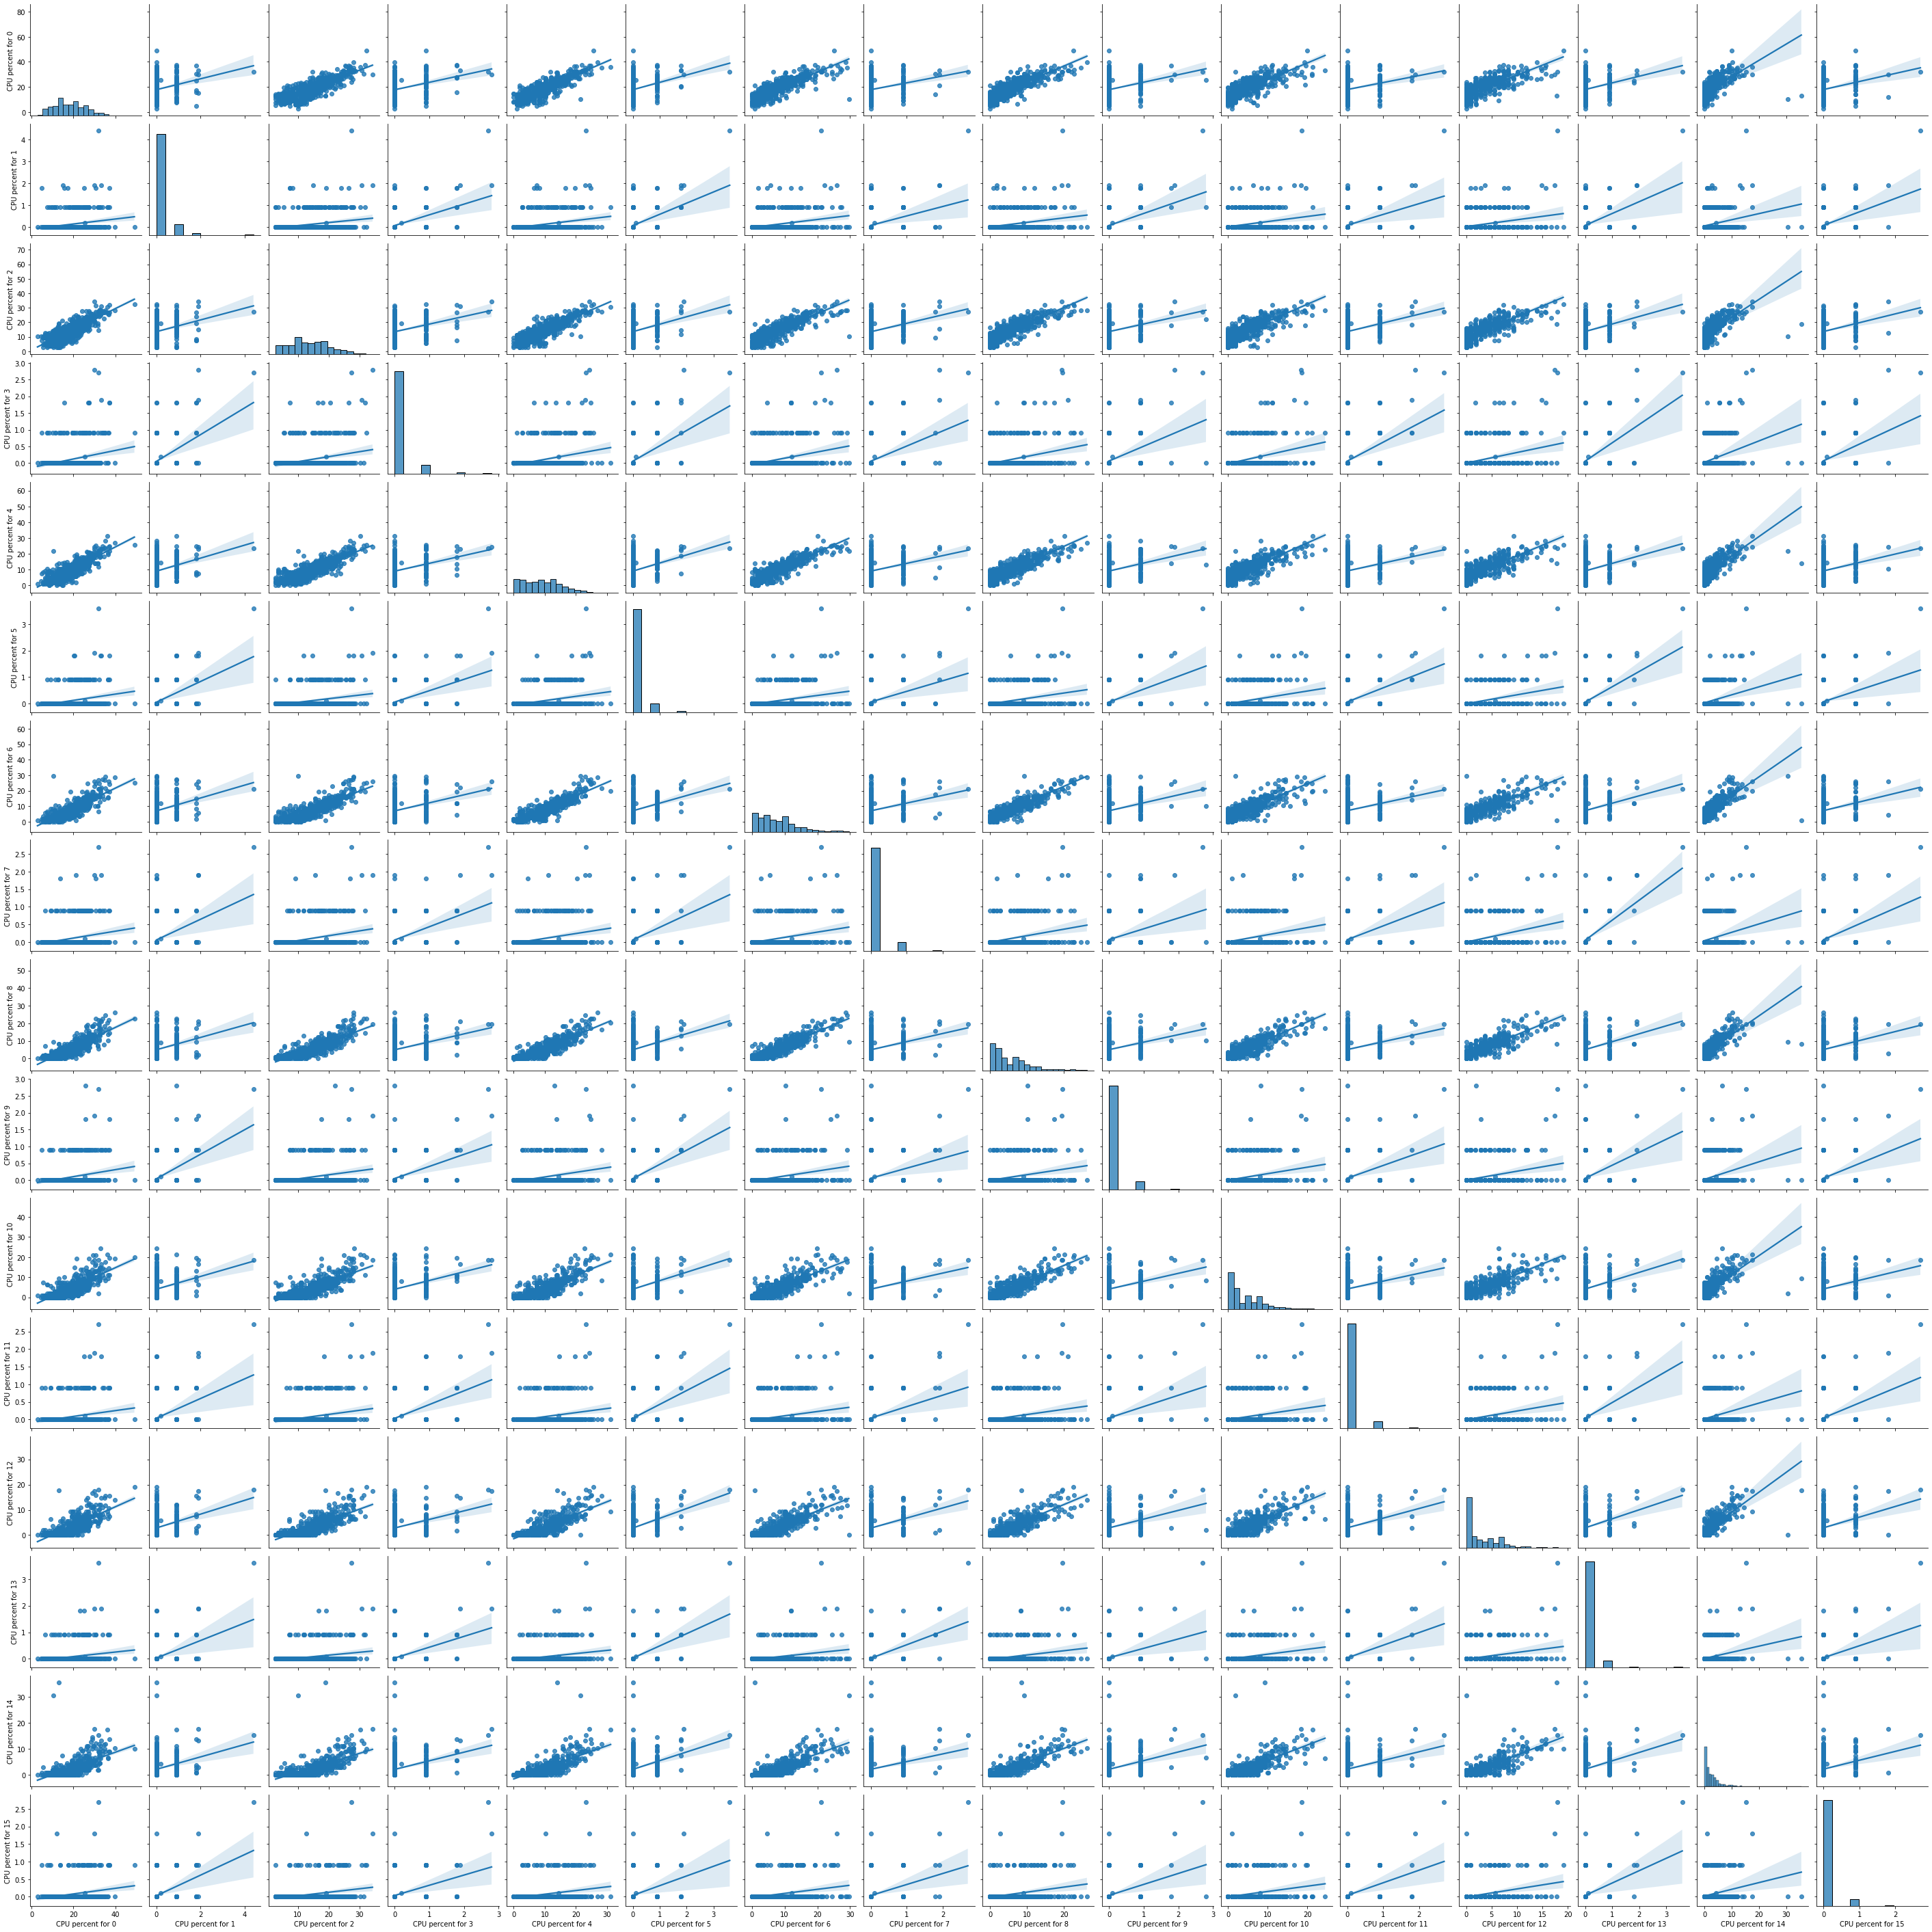

In [14]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
cpu_columns = [ x for x in df.columns if 'CPU percent' in x ]
start_time=time.time()
seaborn.pairplot(df[cpu_columns], kind="reg")
print('elapsed:',time.time()-start_time,'seconds')

In [15]:
df.columns

Index(['CPU percent for 0', 'CPU percent for 1', 'CPU percent for 2',
       'CPU percent for 3', 'CPU percent for 4', 'CPU percent for 5',
       'CPU percent for 6', 'CPU percent for 7', 'CPU percent for 8',
       'CPU percent for 9', 'CPU percent for 10', 'CPU percent for 11',
       'CPU percent for 12', 'CPU percent for 13', 'CPU percent for 14',
       'CPU percent for 15', 'time in unix seconds', 'datetime',
       'CPU 1 times user', 'CPU 1 times system', 'CPU 1 times idle',
       'CPU 2 times user', 'CPU 2 times system', 'CPU 2 times idle',
       'CPU 3 times user', 'CPU 3 times system', 'CPU 3 times idle',
       'CPU 4 times user', 'CPU 4 times system', 'CPU 4 times idle',
       'CPU 5 times user', 'CPU 5 times system', 'CPU 5 times idle',
       'CPU 6 times user', 'CPU 6 times system', 'CPU 6 times idle',
       'CPU 7 times user', 'CPU 7 times system', 'CPU 7 times idle',
       'CPU 8 times user', 'CPU 8 times system', 'CPU 8 times idle',
       'CPU 9 times user', '

evaluate correlation for one pair

In [16]:
df['CPU 1 times idle'].corr(df['process memory: rss'])

0.027306968865729867

calculate the correlation matrix

In [17]:
corr = df.corr()
corr.head()

,CPU percent for 0,CPU percent for 1,CPU percent for 2,CPU percent for 3,CPU percent for 4,CPU percent for 5,CPU percent for 6,CPU percent for 7,CPU percent for 8,CPU percent for 9,...,system virtual memory wired,system swap memory sin,system swap memory sout,process memory: rss,process memory: vms,process memory: pfaults,process memory: uss,process cpu times: user,process cpu times: system,process number context switches: voluntary
CPU percent for 0,1.000000,0.222584,0.815560,0.275501,0.856767,0.263668,0.841851,0.231059,0.843634,0.248482,...,0.416878,0.188840,0.311307,-0.027262,0.008476,-0.025649,-0.027088,-0.001104,0.003377,-0.014628
CPU percent for 1,0.222584,1.000000,0.237965,0.441791,0.264430,0.447296,0.274175,0.355181,0.267676,0.446366,...,0.112843,0.058279,0.087484,0.038140,0.042298,0.038549,0.038175,0.040565,0.040983,0.039287
CPU percent for 2,0.815560,0.237965,1.000000,0.280199,0.852957,0.264869,0.852510,0.283372,0.851744,0.251420,...,0.405915,0.183181,0.302913,-0.010759,0.024360,-0.010546,-0.010516,0.014106,0.018302,0.001765
CPU percent for 3,0.275501,0.441791,0.280199,1.000000,0.287466,0.443986,0.310178,0.412596,0.312964,0.396579,...,0.113938,0.067596,0.100750,0.061685,0.065113,0.062557,0.061658,0.063112,0.063228,0.061964
CPU percent for 4,0.856767,0.264430,0.852957,0.287466,1.000000,0.288138,0.891934,0.259671,0.875990,0.264554,...,0.410491,0.200647,0.318104,0.002260,0.037708,0.003405,0.002383,0.027200,0.031603,0.015001


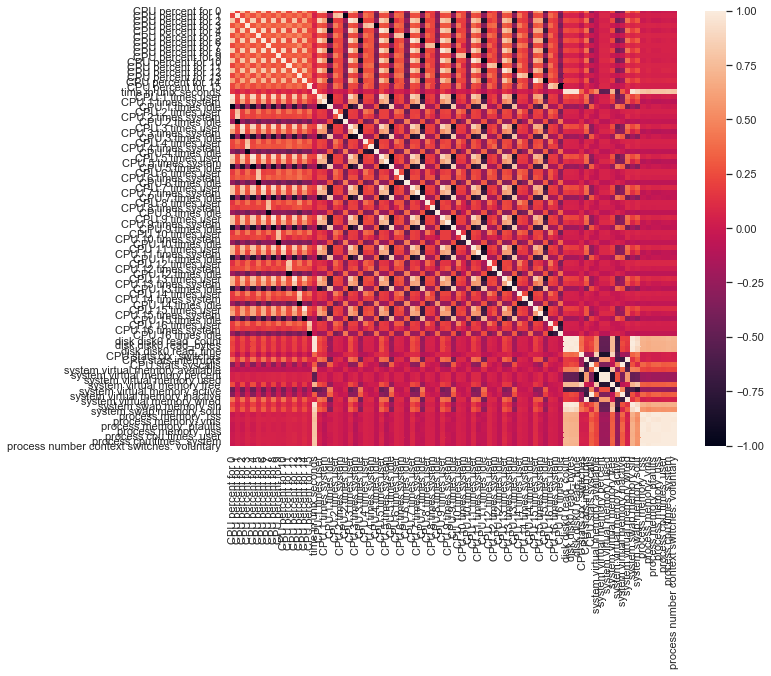

In [18]:
seaborn.set(rc={'figure.figsize':(10,8)})
# plot the heatmap 
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
_=seaborn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)#, annot=True)

# diagonal is 1, indicating perfect correlation
# black means anti-correlated

which columns are correlated?

In [19]:
type(corr)

pandas.core.frame.DataFrame

In [20]:
# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Select upper triangle of correlation matrix
upper = corr.where(numpy.triu(numpy.ones(corr.shape), k=1).astype(numpy.bool))
#upper.head()

system virtual memory used | system virtual memory percent | 0.9994245318720113
system virtual memory used
r -0.514374839194099
p 7.833827634426454e-42
std error: 26499.289228585912


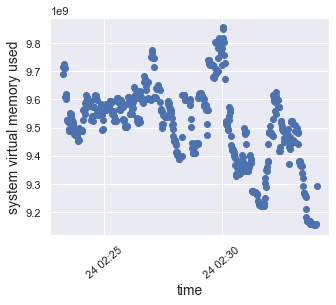

system virtual memory percent
r -0.5156396308080567
p 4.599252153539792e-42
std error: 0.00015471037502129772


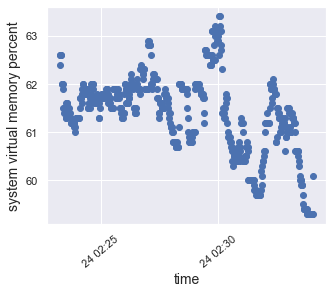

system virtual memory inactive | CPU stats syscalls | 0.9999999999800067
system virtual memory inactive
r 0.31023330849798453
p 7.488152338527629e-15
std error: 15483.772488516053


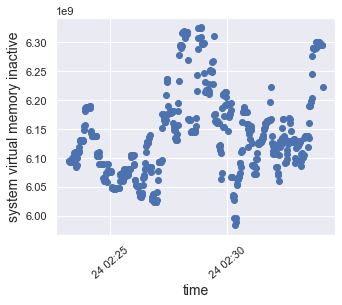

CPU stats syscalls
r 0.31023343752728577
p 7.487950990985197e-15
std error: 3.780217102837163


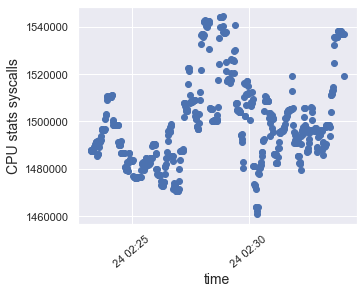

system virtual memory wired | CPU stats interrupts | 0.9999999409191176
system virtual memory wired
r 0.06481184484489749
p 0.11275822535420552
std error: 38259.304297131464


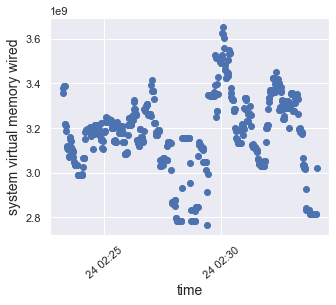

CPU stats interrupts
r 0.06480739268148307
p 0.11278299588243743
std error: 9.340773562168204


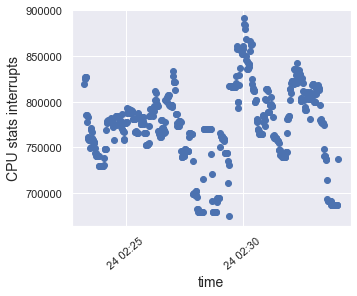

process memory: pfaults | process memory: rss | 0.9992719296917416
process memory: pfaults
r 0.7907717325645137
p 1.378606467265618e-129
std error: 0.021219282045785923


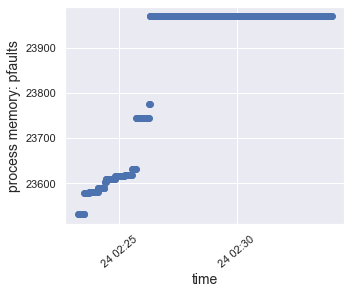

process memory: rss
r 0.7903907336714251
p 2.2297892997268175e-129
std error: 84.0769140607295


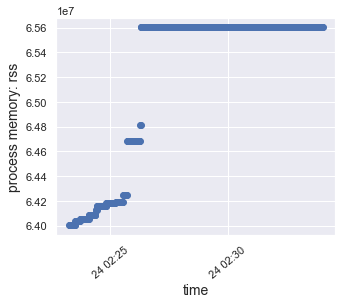

process memory: uss | process memory: rss | 0.9999957841190683
process memory: uss
r 0.7902931331889065
p 2.5216692581819202e-129
std error: 82.8194451035172


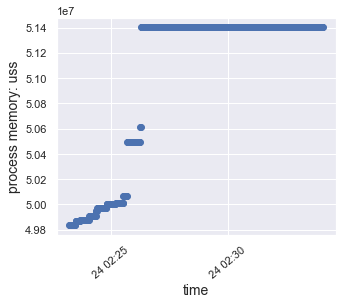

process memory: rss
r 0.7903907336714251
p 2.2297892997268175e-129
std error: 84.0769140607295


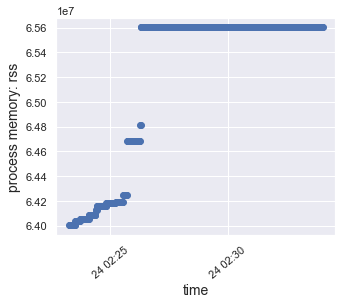

process memory: uss | process memory: pfaults | 0.9991895042275707
process memory: uss
r 0.7902931331889065
p 2.5216692581819202e-129
std error: 82.8194451035172


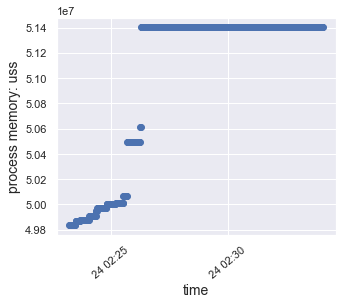

process memory: pfaults
r 0.7907717325645137
p 1.378606467265618e-129
std error: 0.021219282045785923


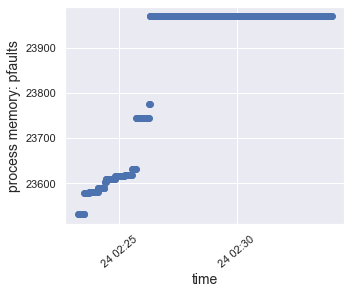

process cpu times: system | process cpu times: user | 0.9998338067921688
process cpu times: system
r 0.8057511408529252
p 3.687336981877551e-138
std error: 6.9909162232397285e-06


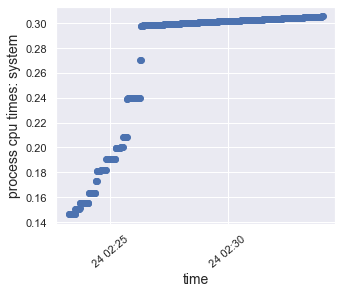

process cpu times: user
r 0.7955040399499342
p 3.2270910979878064e-132
std error: 2.0753129184794744e-05


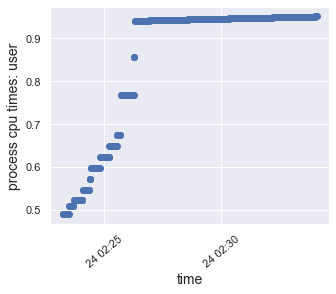

In [21]:
for column in upper.columns:
    #print('column:',column)
    for row in upper.index:
        #print('row:',row)
        #print(upper[column].loc[row])
        if (upper[column].loc[row] > 0.999):
            print(column,'|',row,'|',upper[column].loc[row])
            _=scatter_plot_column(df,column)
            _=scatter_plot_column(df,row)

In [25]:
# seaborn.set(rc={'figure.figsize':(5,4)})
# _=seaborn.regplot(x=df['CPU 1 times idle'], y=df['CPU 1 times softirq'])